In [1]:
import openslide
import numpy as np

In [2]:
slide_path = './data/TCGA-AK-3440-01Z-00-DX1.ea0763b1-4262-4c75-9f76-080af1ffeab7.svs'

# Open the slide
slide = openslide.OpenSlide(slide_path)

In [3]:
# Get some properties of the slide
print("Slide dimensions:", slide.dimensions)
print("Slide levels:", slide.level_count)
print("Slide properties:", slide.properties)

Slide dimensions: (32639, 39328)
Slide levels: 3
Slide properties: <_PropertyMap {'aperio.AppMag': '40', 'aperio.DSR ID': 'aperiodsr', 'aperio.Date': '04/21/11', 'aperio.DisplayColor': '0', 'aperio.Exposure Scale': '0.000001', 'aperio.Exposure Time': '109', 'aperio.Filename': 'TCGA-AK-3433-01A-02D-1274-01-1006125', 'aperio.Focus Offset': '0.000000', 'aperio.ICC Profile': 'ScanScope v1', 'aperio.ImageID': '717', 'aperio.Left': '39.999722', 'aperio.LineAreaXOffset': '0.014476', 'aperio.LineAreaYOffset': '-0.000233', 'aperio.LineCameraSkew': '-0.000149', 'aperio.MPP': '0.2471', 'aperio.OriginalHeight': '39428', 'aperio.OriginalWidth': '34000', 'aperio.ScanScope ID': 'SS5402', 'aperio.StripeWidth': '1000', 'aperio.Time': '10:13:36', 'aperio.Title': 'TCGA-AK-3433-01A-02D-1274-01-1006125', 'aperio.Top': '19.059649', 'aperio.User': 'eb4eda2c-3dfe-4176-9f44-17c4edd43b62', 'openslide.comment': 'Aperio Image Library v10.2.23\r\n34000x39428 [0,100 32639x39328] (256x256) J2K/YUV16 Q=70|AppMag = 40

In [6]:
# Read a region from the slide
# Parameters: (x, y, level, width, height)
region = slide.read_region((0, 0), 0, slide.dimensions)


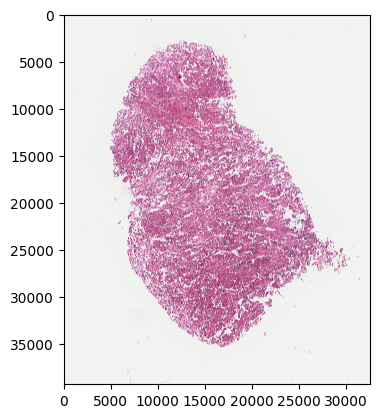

In [7]:

# Display the region using matplotlib
import matplotlib.pyplot as plt
plt.imshow(region)

plt.show()

In [4]:
# Initialize an empty list to hold the pyramid
myPyramid = []

# Iterate through each level in the pyramid
for level in range(slide.level_count):
    # Get the dimensions of the image at the current level
    dims = slide.level_dimensions[level]
    
    # Read the entire region at the current level
    # Note: (0, 0) is the top-left corner of the image
    img = slide.read_region((0, 0), level, dims)
    
    # Convert the image to an RGBA numpy array
    img_np = np.array(img)
    
    # Append the numpy array to the pyramid list
    myPyramid.append(img_np)
    print(myPyramid)

# Close the slide
slide.close()

[array([[[238, 244, 242, 255],
        [238, 244, 242, 255],
        [239, 243, 242, 255],
        ...,
        [244, 244, 246, 255],
        [242, 242, 244, 255],
        [241, 239, 242, 255]],

       [[238, 244, 242, 255],
        [238, 244, 242, 255],
        [239, 243, 242, 255],
        ...,
        [244, 244, 246, 255],
        [242, 242, 244, 255],
        [241, 239, 242, 255]],

       [[238, 244, 242, 255],
        [238, 244, 242, 255],
        [238, 244, 242, 255],
        ...,
        [243, 243, 243, 255],
        [242, 242, 242, 255],
        [241, 239, 242, 255]],

       ...,

       [[243, 246, 239, 255],
        [243, 246, 239, 255],
        [243, 246, 239, 255],
        ...,
        [245, 245, 245, 255],
        [247, 247, 247, 255],
        [248, 246, 247, 255]],

       [[241, 244, 237, 255],
        [241, 244, 237, 255],
        [242, 245, 238, 255],
        ...,
        [249, 249, 249, 255],
        [248, 248, 248, 255],
        [246, 246, 246, 255]],

       [[24

In [5]:
import napari

# Create a Napari viewer
viewer = napari.Viewer()

# Add the image pyramid to the viewer
viewer.add_image(myPyramid, contrast_limits=[0, 255])

# Start the Napari event loop
napari.run()
